## Extraction

In [1]:
!pip -q install kagglehub

In [2]:
import kagglehub

# Download do dataset
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

In [3]:
import pandas as pd

file_path = f"{path}/credit_risk_dataset.csv"
df = pd.read_csv(file_path)

df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
# infos gerais
df.info()

df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


## Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

# Trava valores nulos com a mediana
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

# Converte variáveis categóricas
df = pd.get_dummies(df, columns=["person_home_ownership", "loan_intent"], drop_first=True)

le = LabelEncoder()
df["loan_grade"] = le.fit_transform(df["loan_grade"])

df["cb_person_default_on_file"] = df["cb_person_default_on_file"].map({"Y": 1, "N": 0})

df

C:\Users\lucas\AppData\Local\Temp\ipykernel_11680\1775085783.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_11680\1775085783.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,0,30,False,False,False,False,False,False,True,False
32577,54,120000,4.0,0,17625,7.49,0,0.15,0,19,False,False,False,False,False,False,True,False
32578,65,76000,3.0,1,35000,10.99,1,0.46,0,28,False,False,True,False,True,False,False,False
32579,56,150000,5.0,1,15000,11.48,0,0.10,0,26,False,False,False,False,False,False,True,False


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separar X e y
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Dividir em treino e teste (70/30) com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=61
)

# Escalonar variáveis contínuas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar exibição: sem notação científica e com 4 casas decimais
np.set_printoptions(suppress=True, precision=4)

# Mostrar primeiras linhas já escaladas
X_train_scaled[:5]

array([[-0.427 , -0.0944, -0.9152, -1.0423,  0.0633, -0.0045, -0.0025,
        -0.4636, -0.4429, -0.0559, -0.2938,  0.9897,  2.0108, -0.3524,
        -0.4781, -0.4504, -0.4616],
       [ 0.0433,  1.116 , -0.1904,  0.6749,  1.3268,  1.1859, -0.3762,
         2.1569,  0.2975, -0.0559, -0.2938, -1.0104, -0.4973,  2.8379,
        -0.4781, -0.4504, -0.4616],
       [-0.8972,  0.3141, -1.1568, -0.1837, -0.2526,  0.3923, -0.7499,
        -0.4636, -0.4429, -0.0559, -0.2938, -1.0104, -0.4973, -0.3524,
        -0.4781,  2.2203, -0.4616],
       [ 2.8647,  0.2144, -0.6736, -1.0423,  0.7819, -0.6712,  0.091 ,
        -0.4636,  1.2847, -0.0559, -0.2938,  0.9897,  2.0108, -0.3524,
        -0.4781, -0.4504, -0.4616],
       [ 0.827 ,  1.3127,  1.5008,  0.6749,  0.0633,  1.2315, -0.9368,
         2.1569, -0.1961, -0.0559, -0.2938, -1.0104, -0.4973, -0.3524,
        -0.4781, -0.4504,  2.1663]])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Criar o modelo (com balanceamento de classes, caso o dataset seja desbalanceado)
logit = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1)

# Treinar no conjunto de treino
logit.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = logit.predict(X_test_scaled)
y_proba = logit.predict_proba(X_test_scaled)[:, 1]

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC :", roc_auc_score(y_test, y_proba))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7917135549872123
ROC AUC : 0.8671650475025561

Matriz de confusão:
 [[6041 1601]
 [ 435 1698]]

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9328    0.7905    0.8558      7642
           1     0.5147    0.7961    0.6252      2133

    accuracy                         0.7917      9775
   macro avg     0.7238    0.7933    0.7405      9775
weighted avg     0.8416    0.7917    0.8055      9775



In [9]:
import pandas as pd

# nomes das colunas (features) depois do pré-processamento
feature_names = X.columns

# coeficientes aprendidos pelo modelo
coefs = logit.coef_[0]

# juntar em um DataFrame para visualizar
pesos = pd.DataFrame({
    "Variavel": feature_names,
    "Peso": coefs
}).sort_values(by="Peso", ascending=False)

pesos

,Variavel,Peso
6,loan_percent_income,1.334059
3,loan_grade,1.071208
11,person_home_ownership_RENT,0.285920
13,loan_intent_HOMEIMPROVEMENT,0.039352
1,person_income,0.038169
8,cb_person_cred_hist_length,0.020838
9,person_home_ownership_OTHER,0.016699
5,loan_int_rate,-0.000067
2,person_emp_length,-0.021509
0,person_age,-0.030439


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo (com balanceamento de classes e n_jobs=-1 para usar todos os cores do processador)
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", n_jobs=-1, random_state=61)

# Treinar no conjunto de treino
rf.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC :", roc_auc_score(y_test, y_proba_rf))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred_rf, digits=4))

Accuracy: 0.9367774936061382
ROC AUC : 0.9344810300811282

Matriz de confusão:
 [[7599   43]
 [ 575 1558]]

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9297    0.9944    0.9609      7642
           1     0.9731    0.7304    0.8345      2133

    accuracy                         0.9368      9775
   macro avg     0.9514    0.8624    0.8977      9775
weighted avg     0.9391    0.9368    0.9333      9775



In [12]:
# extrair a importância de cada variável
importances = rf.feature_importances_

# juntar em um DataFrame para visualizar
importancia_features = pd.DataFrame({
    "Variavel": feature_names,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

importancia_features

,Variavel,Importancia
6,loan_percent_income,0.200814
1,person_income,0.168511
3,loan_grade,0.132478
5,loan_int_rate,0.121052
4,loan_amnt,0.080215
2,person_emp_length,0.053798
11,person_home_ownership_RENT,0.050918
0,person_age,0.050775
8,cb_person_cred_hist_length,0.039581
10,person_home_ownership_OWN,0.016694


## Comparative

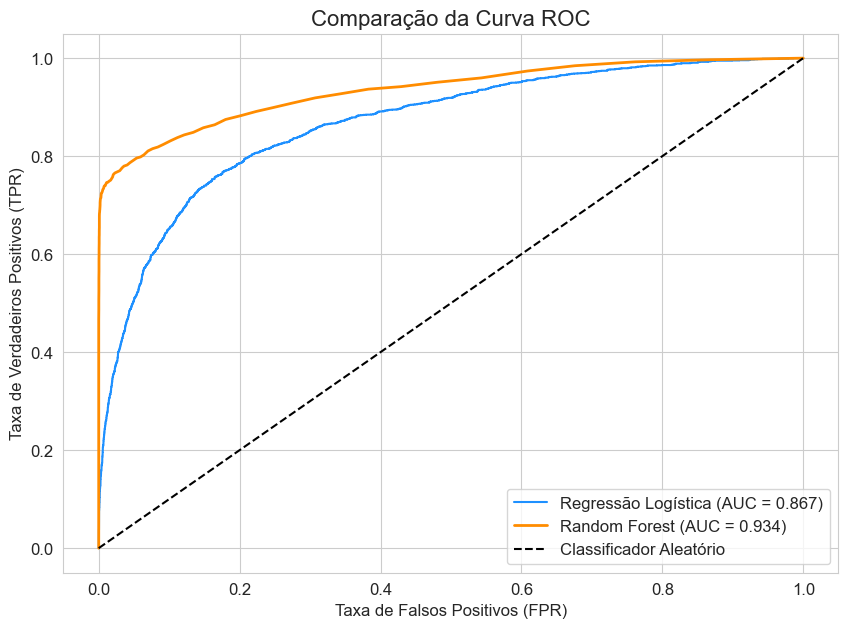

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# --- Configurações de Estilo ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

# --- Calcular a curva ROC para ambos os modelos ---
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_proba)
auc_logit = roc_auc_score(y_test, y_proba)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# --- Plotar as curvas ---
plt.figure(figsize=(10, 7))
plt.plot(fpr_logit, tpr_logit, label=f'Regressão Logística (AUC = {auc_logit:.3f})', color='dodgerblue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório') # Linha de referência

# --- Configurações do gráfico ---
plt.title('Comparação da Curva ROC', fontsize=16)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

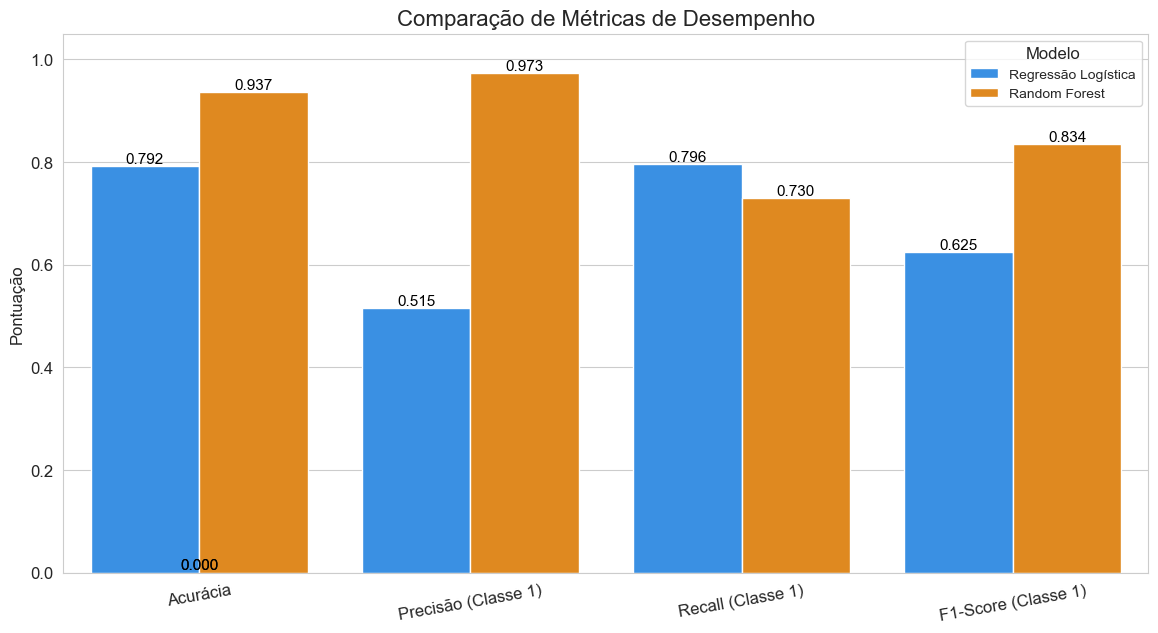

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# --- 2. Gráfico de Barras com as Métricas Principais ---
# Organizar as métricas em um DataFrame
metrics_data = {
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precisão (Classe 1)': [
        classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']
    ],
    'Recall (Classe 1)': [
        classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']
    ],
    'F1-Score (Classe 1)': [
        classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
    ]
}

df_metrics = pd.DataFrame(metrics_data)
df_melted = df_metrics.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

# Plotar o gráfico de barras
plt.figure(figsize=(14, 7))
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melted, palette=['dodgerblue', 'darkorange'])

# Adicionar os valores nas barras para clareza
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Comparação de Métricas de Desempenho', fontsize=16)
plt.ylabel('Pontuação')
plt.xlabel('')
plt.xticks(rotation=10)
plt.ylim(0, 1.05)
plt.legend(title='Modelo', loc='upper right', fontsize='small')
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_11680\2522048849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variavel', data=importancia_features.head(10), ax=axes[0], palette='viridis')
C:\Users\lucas\AppData\Local\Temp\ipykernel_11680\2522048849.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Peso', y='Variavel', data=pesos_sorted, palette=colors, ax=axes[1])


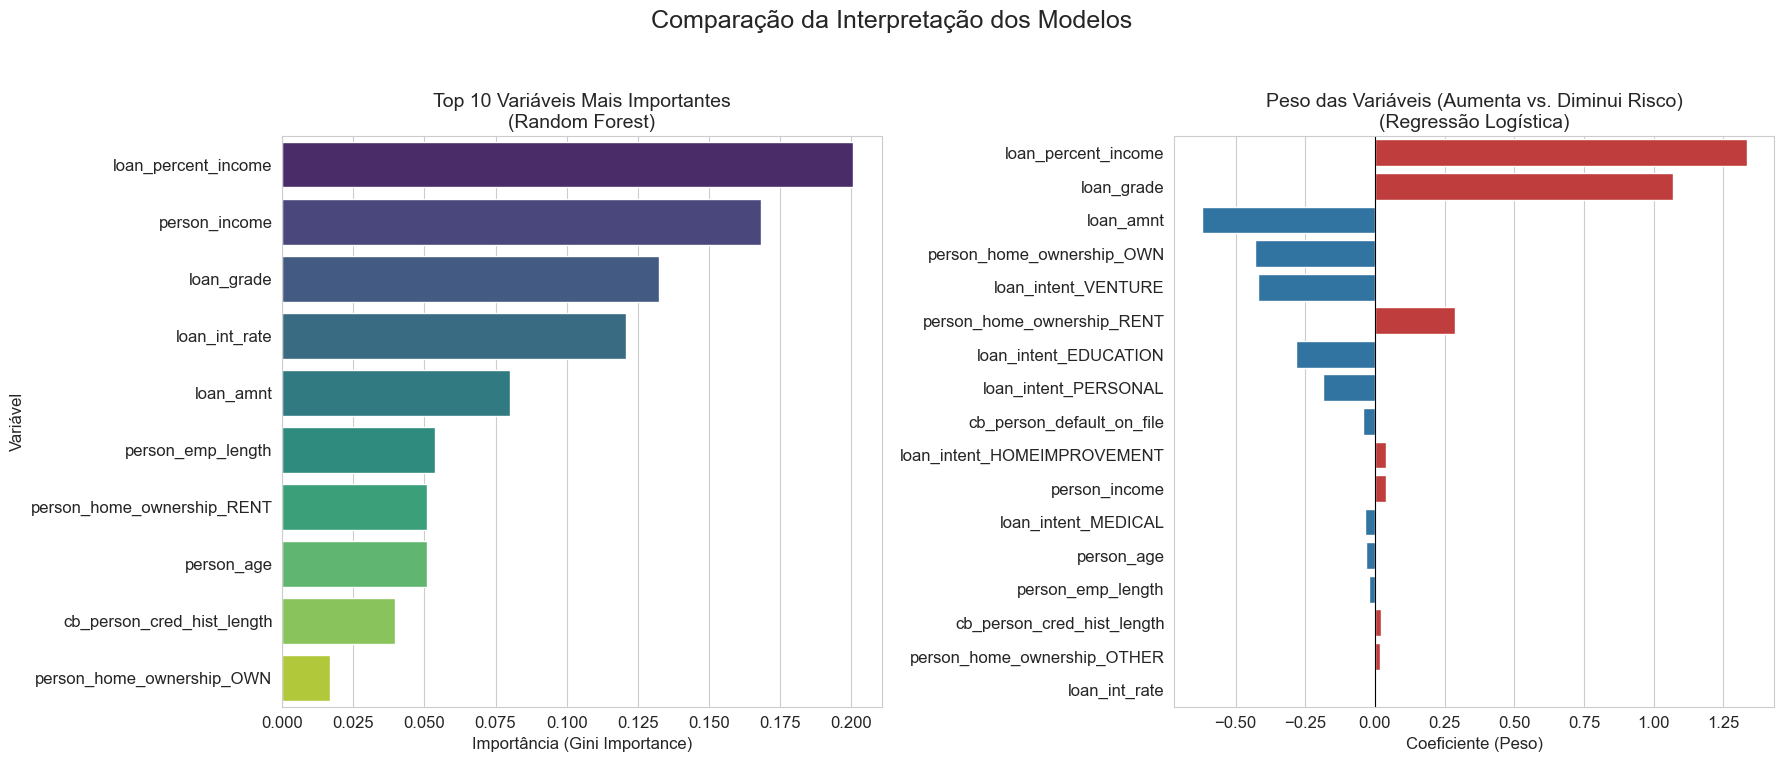

In [17]:
# Criar a figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# --- Gráfico para Random Forest (Top 10) ---
sns.barplot(x='Importancia', y='Variavel', data=importancia_features.head(10), ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Variáveis Mais Importantes\n(Random Forest)', fontsize=14)
axes[0].set_xlabel('Importância (Gini Importance)')
axes[0].set_ylabel('Variável')

# --- Gráfico para Regressão Logística (Todos os Coeficientes) ---
# Ordenar pelo valor absoluto para melhor visualização
pesos_sorted = pesos.reindex(pesos.Peso.abs().sort_values(ascending=False).index)
# Definir cores com base no sinal do peso
colors = ['#d62728' if x > 0 else '#1f77b4' for x in pesos_sorted['Peso']]

sns.barplot(x='Peso', y='Variavel', data=pesos_sorted, palette=colors, ax=axes[1])
axes[1].set_title('Peso das Variáveis (Aumenta vs. Diminui Risco)\n(Regressão Logística)', fontsize=14)
axes[1].set_xlabel('Coeficiente (Peso)')
axes[1].set_ylabel('')
axes[1].axvline(0, color='black', linewidth=0.8) # Linha de referência no zero

# Título geral e ajuste de layout
fig.suptitle('Comparação da Interpretação dos Modelos', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

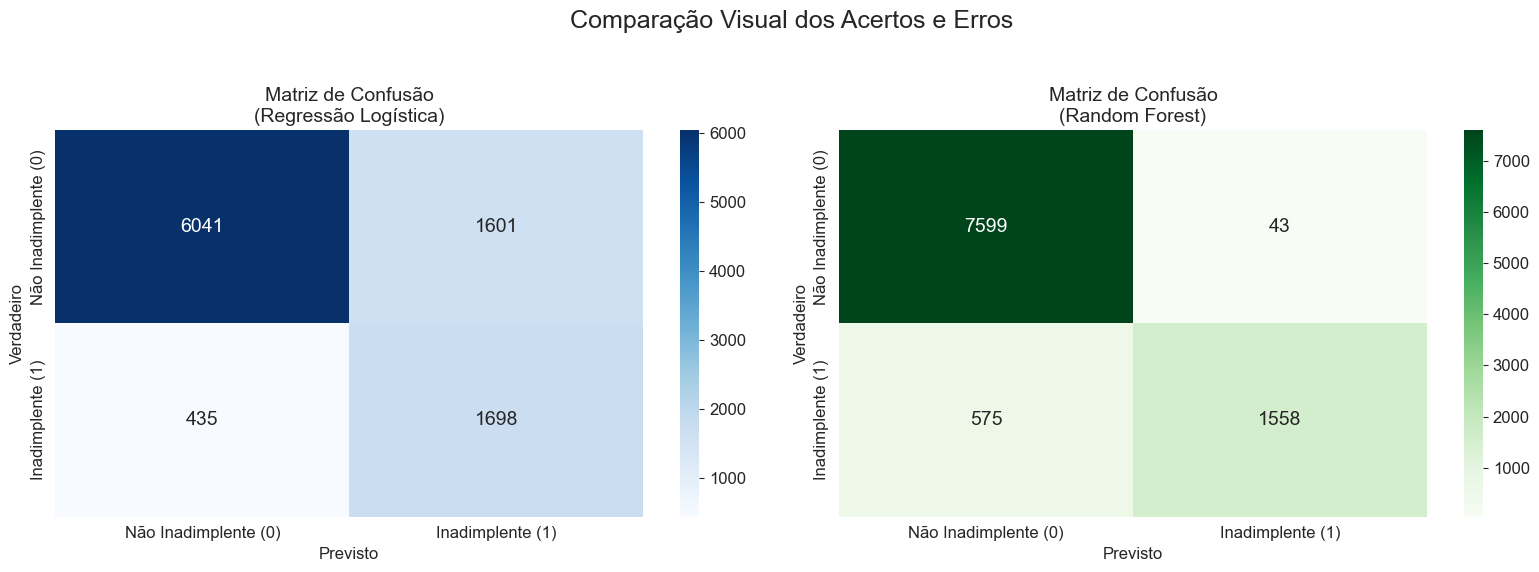

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Heatmap da Matriz de Confusão
# Calcular as matrizes de confusão para cada modelo
cm_logit = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Criar a figura com dois subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Labels para os eixos e ticks
axis_labels = ['Não Inadimplente (0)', 'Inadimplente (1)']

# Heatmap para Regressão Logística
sns.heatmap(cm_logit, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=axis_labels, yticklabels=axis_labels, annot_kws={"size": 14})
axes[0].set_title('Matriz de Confusão\n(Regressão Logística)', fontsize=14)
axes[0].set_xlabel('Previsto')
axes[0].set_ylabel('Verdadeiro')

# --- Heatmap para Random Forest ---
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=axis_labels, yticklabels=axis_labels, annot_kws={"size": 14})
axes[1].set_title('Matriz de Confusão\n(Random Forest)', fontsize=14)
axes[1].set_xlabel('Previsto')
axes[1].set_ylabel('Verdadeiro')

# Título geral
fig.suptitle('Comparação Visual dos Acertos e Erros', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()